In [2]:
#Maestría en Economía Aplicada - UBA

#Taller de Programación

#Trabajo Práctico 3

#Docente: Noelia Romero

#Grupo No 5

#Cammisi, Andrés // Porco, Matías // Pineda, David

In [ ]:
#-------------------------------------------------------------
# PREPARACIÓN DE LA BASE DE DATOS
# ------------------------------------------------------------

In [3]:
# ============================================================
# TP4 - PREPARACIÓN DE LA BASE DE DATOS (Año 2025)
# ============================================================

# 1. Librerías
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------
# 2. Directorio de trabajo
# ------------------------------------------------------------
path = '/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP4'
os.chdir(path)
print("Working Directory:", os.getcwd())

# ------------------------------------------------------------
# 3. Cargar base de datos (TP4)
# ------------------------------------------------------------
fname = 'eph_tp4_05_25.csv'
df = pd.read_csv(fname)

print("Dimensiones:", df.shape)
print("\nVista previa:")
display(df.head())


Working Directory: /Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP4
Dimensiones: (28454, 29)

Vista previa:


,anio,cat_inac,cat_ocup,ch03,ch04,ch06,ch07,ch08,ch12,ch13,...,pp03d,pp04a,pp04c,pp10a,pp3e_tot,pp3e_tot_missing,pp3f_tot,pp3f_tot_missing,lp_pc,pobre
0,2005,0.0,3.0,1.0,1.0,28.0,2.0,4.0,2.0,1.0,...,0.0,2.0,4.0,0.0,72.0,0,0.0,0,205.07,0
1,2005,0.0,3.0,2.0,2.0,30.0,2.0,1.0,6.0,1.0,...,2.0,1.0,6.0,0.0,30.0,0,12.0,0,205.07,0
2,2005,5.0,0.0,3.0,1.0,4.0,5.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,205.07,0
3,2005,0.0,3.0,1.0,1.0,66.0,2.0,2.0,4.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0,0.0,0,205.07,0
4,2005,0.0,3.0,2.0,2.0,60.0,2.0,2.0,4.0,2.0,...,0.0,2.0,3.0,0.0,0.0,0,0.0,0,205.07,0


In [4]:
# ------------------------------------------------------------
# 4. Filtrar únicamente las observaciones del año 2025
# ------------------------------------------------------------
df_2025 = df[df['anio'] == 2025].copy()

print("Dimensiones base 2025:", df_2025.shape)


Dimensiones base 2025: (13803, 29)


In [5]:
# =============================================================
# 3) Marcamos quién respondió ingreso y definimos variables_x
# =============================================================
import numpy as np

# Crear variable 'respondieron' basada en itf > 0 (igual que en TP3)
df['respondieron'] = df['itf'] > 0
print(f"Personas que respondieron ingreso: {(df['respondieron'].mean()*100):.1f}%")

# Separar bases respondieron / norespondieron (toda la muestra 2005–2025)
respondieron = df[df['respondieron'] == True].copy()
norespondieron = df[df['respondieron'] == False].copy()

print(f"Respondieron: {len(respondieron):,} observaciones")
print(f"No respondieron: {len(norespondieron):,} observaciones")

# Misma selección de variables que en el TP3
variables_x = [
    'ch03',          # Parentesco
    'ch04',          # Sexo
    'ch06',          # Edad
    'ch07',          # Estado civil
    'estado',        # Condición de actividad
    'nivel_ed',      # Nivel educativo
    'cat_ocup',      # Categoría ocupacional
    'cat_inac',      # Categoría de inactividad
    'miembros_hogar' # Tamaño del hogar
]

print("\nVariables seleccionadas para el modelo:")
print(variables_x)

# Chequeo rápido de que existan todas en la base
variables_faltantes = [v for v in variables_x if v not in df.columns]
if variables_faltantes:
    print("⚠️ Variables faltantes:", variables_faltantes)
else:
    print("✅ Todas las variables seleccionadas están disponibles en la base.")


Personas que respondieron ingreso: 83.7%
Respondieron: 23,821 observaciones
No respondieron: 4,633 observaciones

Variables seleccionadas para el modelo:
['ch03', 'ch04', 'ch06', 'ch07', 'estado', 'nivel_ed', 'cat_ocup', 'cat_inac', 'miembros_hogar']
✅ Todas las variables seleccionadas están disponibles en la base.


In [6]:
# =============================================================
# 4) Filtrar respondieron_2025 y armar X_2025, y_2025
# =============================================================

# Filtrar solo año 2025, igual que en TP3
respondieron_2025 = respondieron[respondieron['anio'] == 2025].copy()
norespondieron_2025 = norespondieron[norespondieron['anio'] == 2025].copy()

print("\nDistribución por año 2025:")
print(f"• Respondieron 2025: {len(respondieron_2025):,}")
print(f"• No respondieron 2025: {len(norespondieron_2025):,}")

# Matriz de features y vector objetivo (mismas variables que TP3)
X_2025 = respondieron_2025[variables_x].copy()
y_2025 = respondieron_2025['pobre'].astype(int)

print("\nDimensiones de X_2025 e y_2025:")
print("X_2025:", X_2025.shape)
print("y_2025 (tasa de pobreza):", y_2025.mean().round(3))

# =============================================================
# 5) Train/Test split 70/30 con semilla 444 (igual que TP3)
# =============================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_2025,
    y_2025,
    test_size=0.30,
    random_state=444,
    stratify=y_2025  # opcional pero recomendable: mantiene proporción de pobres
)

print("\nSplit 2025 - respondieron:")
print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_test :", X_test.shape,  "| y_test :", y_test.shape)
print("Tasa de pobreza en train:", y_train.mean().round(3))
print("Tasa de pobreza en test :", y_test.mean().round(3))



Distribución por año 2025:
• Respondieron 2025: 9,340
• No respondieron 2025: 4,463

Dimensiones de X_2025 e y_2025:
X_2025: (9340, 9)
y_2025 (tasa de pobreza): 0.462

Split 2025 - respondieron:
X_train: (6538, 9) | y_train: (6538,)
X_test : (2802, 9) | y_test : (2802,)
Tasa de pobreza en train: 0.462
Tasa de pobreza en test : 0.463


In [ ]:
# ------------------------------------------------------------
# A. MODELO DE REGRESIÓN LÓGISTICA
# REGULARIZACIÓN RIDGE Y LASSO
# ------------------------------------------------------------

In [7]:
# =============================================================
# A.1.1) Definir grilla de λ = 10^n y C = 1/λ
# =============================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

sns.set(style="whitegrid")

# Exponentes n = -5, -4, ..., 4, 5
exponentes = np.arange(-5, 6)

# λ = 10^n
lambdas = 10.0 ** exponentes

# C es la inversa de la penalidad λ
C_values = 1.0 / lambdas

print("Grilla de λ:")
print(lambdas)
print("\nGrilla de C (1/λ):")
print(C_values)


Grilla de λ:
[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]

Grilla de C (1/λ):
[1.e+05 1.e+04 1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04
 1.e-05]


In [8]:
# =============================================================
# A.1.2) Ajuste de modelos L1 y L2 para cada valor de λ
# =============================================================

coefs_l1 = []   # coeficientes LASSO para cada λ
coefs_l2 = []   # coeficientes Ridge para cada λ

for C in C_values:
    # Modelo LASSO (penalidad L1)
    logit_l1 = LogisticRegression(
        penalty='l1',
        C=C,
        solver='liblinear',
        random_state=444,
        max_iter=5000
    )
    logit_l1.fit(X_train, y_train)
    coefs_l1.append(logit_l1.coef_[0])

    # Modelo Ridge (penalidad L2)
    logit_l2 = LogisticRegression(
        penalty='l2',
        C=C,
        solver='liblinear',
        random_state=444,
        max_iter=5000
    )
    logit_l2.fit(X_train, y_train)
    coefs_l2.append(logit_l2.coef_[0])

coefs_l1 = np.vstack(coefs_l1)   # (n_lambdas, n_vars)
coefs_l2 = np.vstack(coefs_l2)

print("\nDimensión matriz coeficientes (L1):", coefs_l1.shape)
print("Dimensión matriz coeficientes (L2):", coefs_l2.shape)



Dimensión matriz coeficientes (L1): (11, 9)
Dimensión matriz coeficientes (L2): (11, 9)


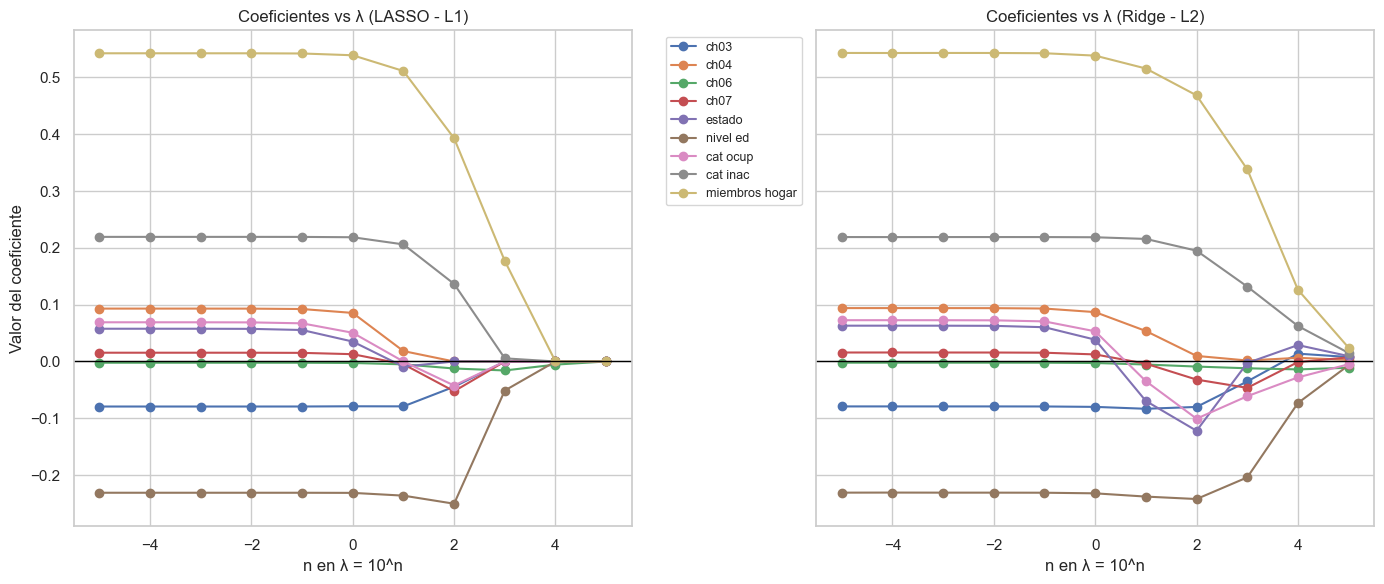

In [9]:
# =============================================================
# A.1.3) Gráficos de coeficientes: LASSO vs Ridge
# =============================================================
variables = X_train.columns

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
ax_l1, ax_l2 = axes

# Panel izquierda: LASSO (L1)
for j, var in enumerate(variables):
    ax_l1.plot(
        exponentes,            # usamos n para el eje x (log10 λ)
        coefs_l1[:, j],
        marker='o',
        label=var.replace("_", " ")
    )

ax_l1.set_title("Coeficientes vs λ (LASSO - L1)")
ax_l1.set_xlabel("n en λ = 10^n")
ax_l1.set_ylabel("Valor del coeficiente")
ax_l1.axhline(0, color='black', linewidth=1)
ax_l1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

# Panel derecha: Ridge (L2)
for j, var in enumerate(variables):
    ax_l2.plot(
        exponentes,
        coefs_l2[:, j],
        marker='o',
        label=var.replace("_", " ")
    )

ax_l2.set_title("Coeficientes vs λ (Ridge - L2)")
ax_l2.set_xlabel("n en λ = 10^n")
ax_l2.axhline(0, color='black', linewidth=1)
# La leyenda queda en el panel izquierdo para no duplicar

plt.tight_layout()
plt.show()


In [10]:
# =============================================================
# A.2.1) LOGISTIC REGRESSION CV (5-fold) PARA L1 Y L2
# =============================================================
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Grilla de C (inversa de λ) — ya definida antes como C_values
C_grid = C_values  # C = 1 / λ

# -------------------------------------------------------------
# LASSO (L1) con CV
# -------------------------------------------------------------
logit_l1_cv = LogisticRegressionCV(
    Cs=C_grid,
    cv=5,
    penalty='l1',
    solver='liblinear',
    scoring='accuracy',
    random_state=444,
    max_iter=5000,
    refit=True
)

logit_l1_cv.fit(X_train, y_train)

# mejor C encontrado por CV
best_C_l1 = logit_l1_cv.C_[0]
best_lambda_l1 = 1 / best_C_l1
print(f"Mejor λ (L1) encontrado por CV: {best_lambda_l1:.6f}  |  Mejor C: {best_C_l1:.6f}")

# Extraer accuracies medios por C
mean_scores_l1 = logit_l1_cv.scores_[1].mean(axis=0)  
error_l1 = 1 - mean_scores_l1             # error de clasificación


Mejor λ (L1) encontrado por CV: 100.000000  |  Mejor C: 0.010000


In [11]:
# -------------------------------------------------------------
# Ridge (L2) con CV
# -------------------------------------------------------------
logit_l2_cv = LogisticRegressionCV(
    Cs=C_grid,
    cv=5,
    penalty='l2',
    solver='liblinear',
    scoring='accuracy',
    random_state=444,
    max_iter=5000,
    refit=True
)

logit_l2_cv.fit(X_train, y_train)

# mejor C encontrado por CV
best_C_l2 = logit_l2_cv.C_[0]
best_lambda_l2 = 1 / best_C_l2
print(f"Mejor λ (L2) encontrado por CV: {best_lambda_l2:.6f}  |  Mejor C: {best_C_l2:.6f}")

# Extraer accuracies medios por C
mean_scores_l2 = logit_l2_cv.scores_[1].mean(axis=0)
error_l2 = 1 - mean_scores_l2


Mejor λ (L2) encontrado por CV: 100.000000  |  Mejor C: 0.010000


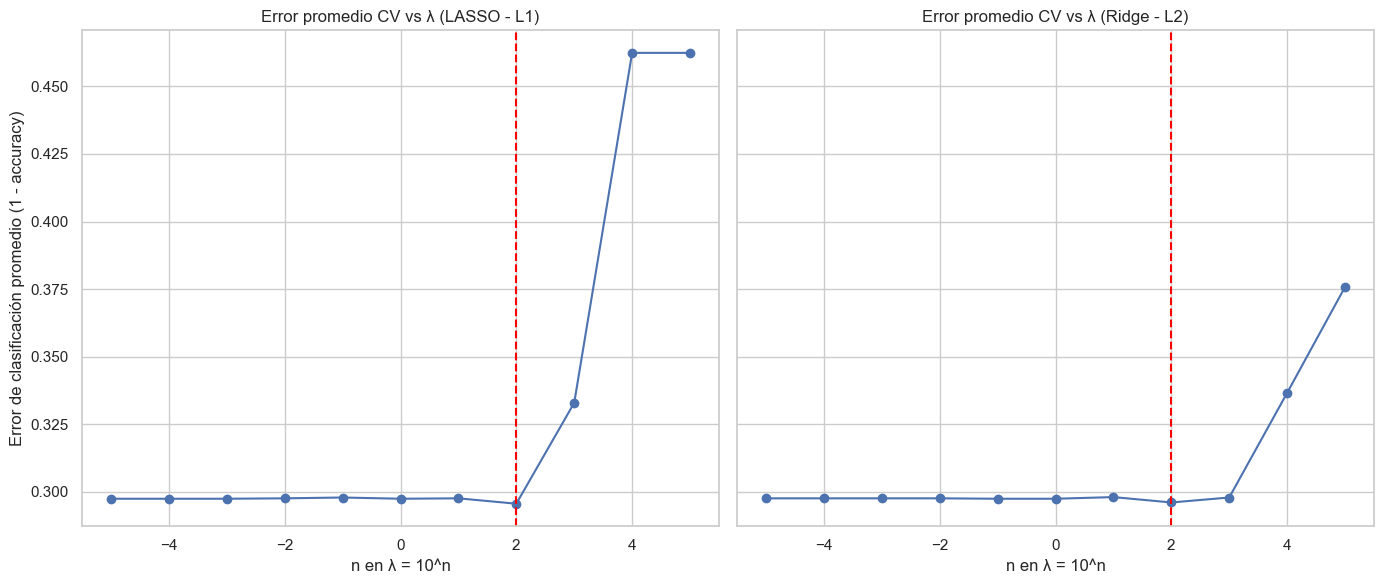

In [12]:
# =============================================================
# A.2.2) GRÁFICO: ERROR PROMEDIO POR λ (L1 y L2)
# =============================================================
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Panel L1
ax1 = ax[0]
ax1.plot(exponentes, error_l1, marker='o')
ax1.set_title("Error promedio CV vs λ (LASSO - L1)")
ax1.set_xlabel("n en λ = 10^n")
ax1.set_ylabel("Error de clasificación promedio (1 - accuracy)")
ax1.grid(True)
ax1.axvline(exponentes[np.argmin(error_l1)], color='red', linestyle='--')

# Panel L2
ax2 = ax[1]
ax2.plot(exponentes, error_l2, marker='o')
ax2.set_title("Error promedio CV vs λ (Ridge - L2)")
ax2.set_xlabel("n en λ = 10^n")
ax2.grid(True)
ax2.axvline(exponentes[np.argmin(error_l2)], color='red', linestyle='--')

plt.tight_layout()
plt.show()


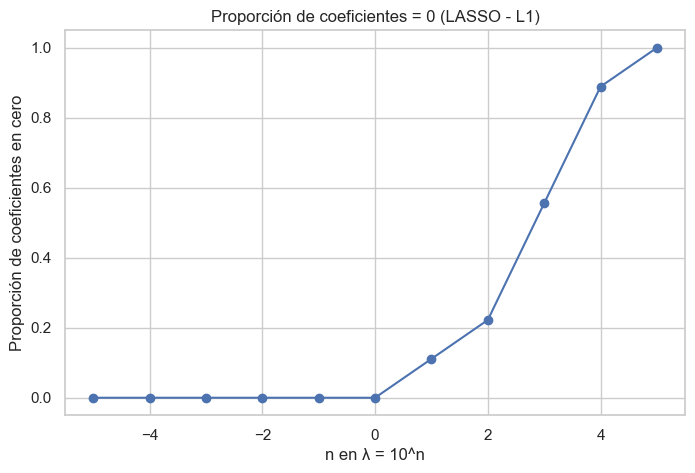

In [13]:
# =============================================================
# A.2.3) PROPORCIÓN DE COEFICIENTES = 0 (Solo LASSO)
# =============================================================
proporcion_ceros = []

for C in C_grid:
    modelo = LogisticRegression(
        penalty='l1',
        C=C,
        solver='liblinear',
        max_iter=5000
    )
    modelo.fit(X_train, y_train)
    coef = modelo.coef_[0]
    proporcion_ceros.append(np.mean(coef == 0))

plt.figure(figsize=(8, 5))
plt.plot(exponentes, proporcion_ceros, marker='o')
plt.title("Proporción de coeficientes = 0 (LASSO - L1)")
plt.xlabel("n en λ = 10^n")
plt.ylabel("Proporción de coeficientes en cero")
plt.grid(True)
plt.show()


In [15]:
# =============================================================
# A.3.1) MODELOS FINALES: SIN PENALIDAD, L1 y L2 (λ = λ^cv)
# =============================================================
from sklearn.linear_model import LogisticRegression

# 1) Logit SIN penalidad  (penalty=None)
logit_none = LogisticRegression(
    penalty=None,           # <-- CORRECCIÓN
    solver='lbfgs',         # <-- lbfgs sí permite sin penalización
    max_iter=5000
)
logit_none.fit(X_train, y_train)

# 2) Logit L1 con λ^cv (C = best_C_l1)
logit_l1_final = LogisticRegression(
    penalty='l1',
    C=best_C_l1,
    solver='liblinear',
    random_state=444,
    max_iter=5000
)
logit_l1_final.fit(X_train, y_train)

# 3) Logit L2 con λ^cv (C = best_C_l2)
logit_l2_final = LogisticRegression(
    penalty='l2',
    C=best_C_l2,
    solver='liblinear',
    random_state=444,
    max_iter=5000
)
logit_l2_final.fit(X_train, y_train)

# Comprobación: cuántos coeficientes en cero?
n_zeros_l1 = (logit_l1_final.coef_[0] == 0).sum()
n_zeros_l2 = (logit_l2_final.coef_[0] == 0).sum()

print(f"Coeficientes exactamente = 0 con L1: {n_zeros_l1} de {X_train.shape[1]}")
print(f"Coeficientes exactamente = 0 con L2: {n_zeros_l2} de {X_train.shape[1]}")


Coeficientes exactamente = 0 con L1: 2 de 9
Coeficientes exactamente = 0 con L2: 0 de 9


In [16]:
# =============================================================
# A.3.2) TABLA DE COEFICIENTES: SIN PENALIDAD vs L1 vs L2
# =============================================================
import pandas as pd

vars_tabla = list(X_train.columns)

# Coeficientes (solo para las variables, sin intercepto)
coef_none = logit_none.coef_[0]
coef_l1   = logit_l1_final.coef_[0]
coef_l2   = logit_l2_final.coef_[0]

tabla_coefs = pd.DataFrame({
    'variable'              : vars_tabla,
    'logit_sin_penalidad'   : coef_none,
    'logit_L1_lambda_cv'    : coef_l1,
    'logit_L2_lambda_cv'    : coef_l2
})

tabla_coefs.set_index('variable', inplace=True)
display(tabla_coefs.round(4))

# Exportar a CSV para el informe
tabla_coefs.to_csv('coefs_logit_regularizacion_2025.csv')
print("\nTabla de coeficientes exportada como 'coefs_logit_regularizacion_2025.csv'")



,logit_sin_penalidad,logit_L1_lambda_cv,logit_L2_lambda_cv
variable,,,
ch03,-0.0791,-0.0445,-0.0800
ch04,0.0943,0.0000,0.0098
ch06,-0.0021,-0.0123,-0.0089
ch07,0.0159,-0.0524,-0.0319
estado,0.0635,0.0000,-0.1220
nivel_ed,-0.2307,-0.2504,-0.2421
cat_ocup,0.0728,-0.0423,-0.1007
cat_inac,0.2189,0.1365,0.1951
miembros_hogar,0.5435,0.3929,0.4685



Tabla de coeficientes exportada como 'coefs_logit_regularizacion_2025.csv'


In [17]:
# ----------------------------------------------------------------
# B. ÁRBOLES DE DECISIÓN
# ----------------------------------------------------------------

In [18]:
# =============================================================
# B.1.1) Árbol inicial para obtener grilla de ccp_alpha
# =============================================================
from sklearn.tree import DecisionTreeClassifier

# Árbol no podado (complejo) para derivar ccp_alphas
tree_raw = DecisionTreeClassifier(
    random_state=444
)
tree_raw.fit(X_train, y_train)

# Grilla de valores de costo de complejidad
path = tree_raw.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print("Cantidad de valores en grilla ccp_alpha:", len(ccp_alphas))
print("Primeros valores:", ccp_alphas[:10])


Cantidad de valores en grilla ccp_alpha: 812
Primeros valores: [ 0.00000000e+00 -5.42101086e-20 -5.42101086e-20  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [20]:
# =============================================================
# B.1.2) 10-FOLD CV PARA CADA CCP_ALPHA  (CORREGIDO)
# =============================================================
from sklearn.model_selection import cross_val_score
import numpy as np

# 1) Limpiar grilla de ccp_alpha: quitar negativos y duplicados
ccp_alphas_clean = np.unique(ccp_alphas)
ccp_alphas_clean = ccp_alphas_clean[ccp_alphas_clean >= 0]

print("Cantidad de ccp_alpha luego de limpieza:", len(ccp_alphas_clean))
print("Primeros valores (limpios):", ccp_alphas_clean[:10])

# 2) Cross-validation para cada ccp_alpha
mean_errors = []

for ccp in ccp_alphas_clean:
    tree = DecisionTreeClassifier(
        random_state=444,
        ccp_alpha=ccp
    )
    scores = cross_val_score(
        tree,
        X_train,
        y_train,
        cv=10,
        scoring='accuracy'
    )
    mean_error = 1 - scores.mean()
    mean_errors.append(mean_error)

mean_errors = np.array(mean_errors)
best_index = np.argmin(mean_errors)

best_ccp_alpha = ccp_alphas_clean[best_index]
print(f"\nMejor ccp_alpha por CV: {best_ccp_alpha:.6f}")


Cantidad de ccp_alpha luego de limpieza: 566
Primeros valores (limpios): [0.00000000e+00 2.49921525e-07 4.73535520e-07 9.93194630e-07
 1.82085682e-06 1.96092273e-06 2.24929372e-06 2.64851901e-06
 2.68926546e-06 2.96634130e-06]

Mejor ccp_alpha por CV: 0.000719


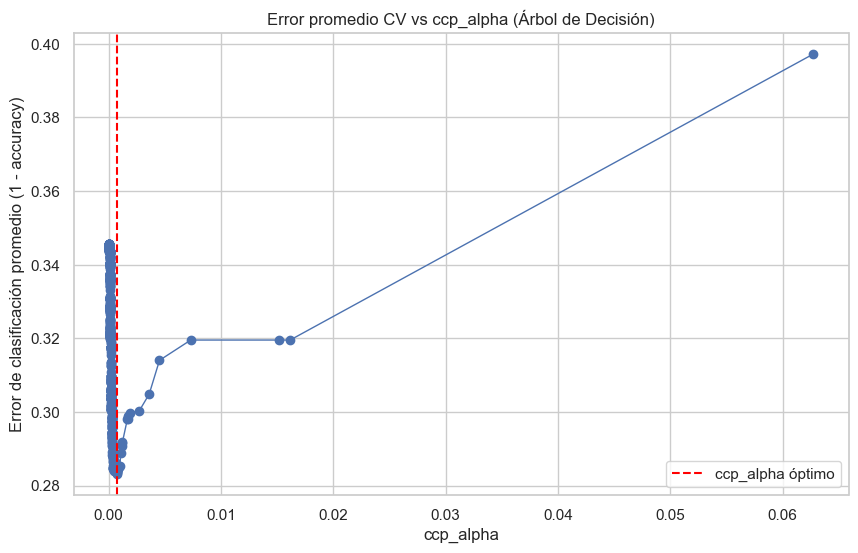

In [21]:
# =============================================================
# B.1.3) GRÁFICO: ERROR PROMEDIO VS CCP_ALPHA  (CORREGIDO)
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_clean, mean_errors, marker='o', linewidth=1)
plt.axvline(best_ccp_alpha, color='red', linestyle='--', label='ccp_alpha óptimo')
plt.xlabel("ccp_alpha")
plt.ylabel("Error de clasificación promedio (1 - accuracy)")
plt.title("Error promedio CV vs ccp_alpha (Árbol de Decisión)")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# =============================================================
# B.2.1) ENTRENAR ÁRBOL FINAL PODADO CON ccp_alpha ÓPTIMO
# =============================================================
from sklearn.tree import DecisionTreeClassifier

tree_final = DecisionTreeClassifier(
    random_state=444,
    ccp_alpha=best_ccp_alpha
)

tree_final.fit(X_train, y_train)

print("Profundidad del árbol podado:", tree_final.get_depth())
print("Cantidad de nodos:", tree_final.tree_.node_count)


Profundidad del árbol podado: 8
Cantidad de nodos: 55


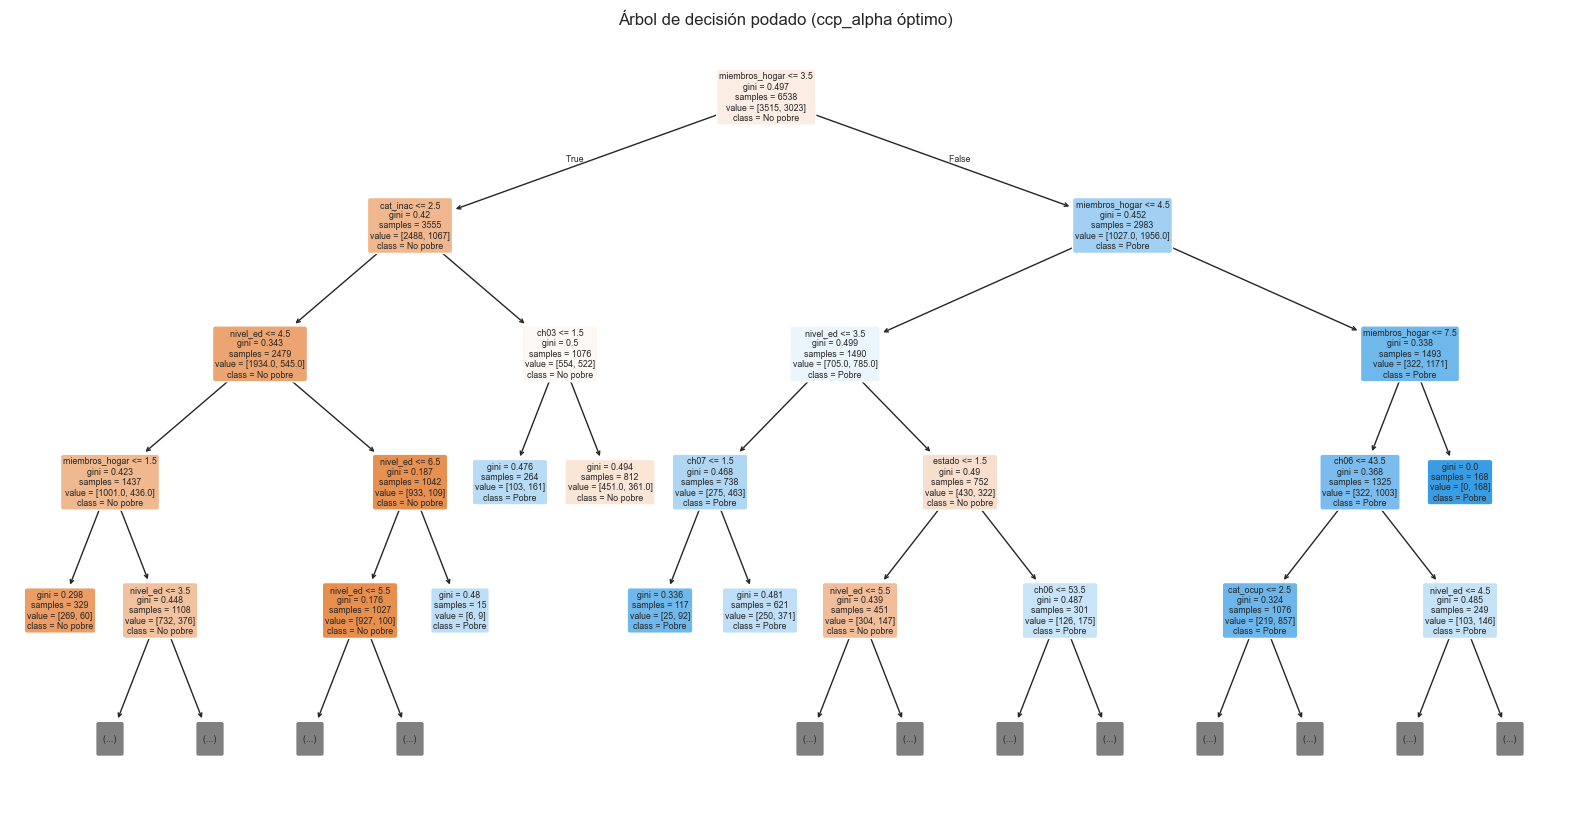

In [23]:
# =============================================================
# B.2.2) PANEL A: VISUALIZACIÓN DEL ÁRBOL PODADO
# =============================================================
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    tree_final,
    filled=True,
    rounded=True,
    feature_names=X_train.columns,
    class_names=['No pobre', 'Pobre'],
    max_depth=4   # Para no saturar la visualización
)
plt.title("Árbol de decisión podado (ccp_alpha óptimo)")
plt.show()


/var/folders/s4/6l24fs1j5832swn8lwhsnhnm0000gn/T/ipykernel_67199/528407369.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


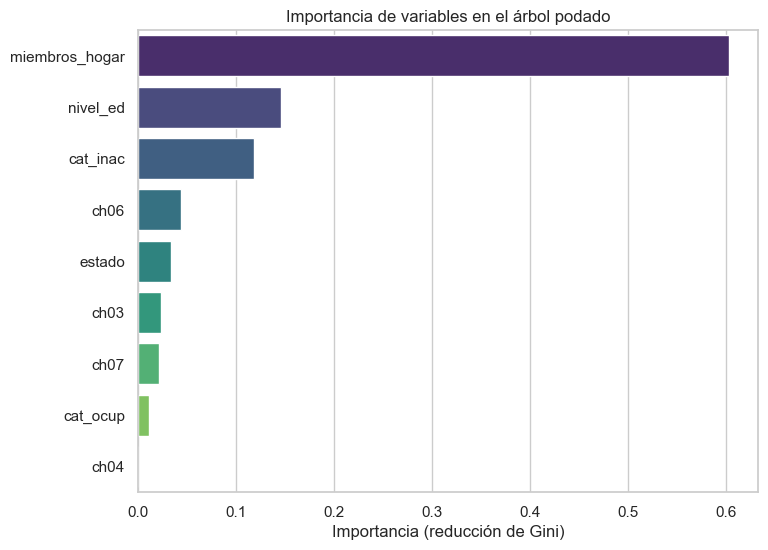

,variable,importancia
8,miembros_hogar,0.602984
5,nivel_ed,0.145509
7,cat_inac,0.118114
2,ch06,0.044259
4,estado,0.033604
0,ch03,0.023308
3,ch07,0.020875
6,cat_ocup,0.011348
1,ch04,0.000000


In [24]:
# =============================================================
# B.2.3) PANEL B: IMPORTANCIA DE VARIABLES
# =============================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importancias = tree_final.feature_importances_

df_imp = pd.DataFrame({
    'variable': X_train.columns,
    'importancia': importancias
}).sort_values(by='importancia', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_imp,
    x='importancia',
    y='variable',
    palette='viridis'
)
plt.title("Importancia de variables en el árbol podado")
plt.xlabel("Importancia (reducción de Gini)")
plt.ylabel("")
plt.show()

display(df_imp)


In [25]:
# ----------------------------------------------------------------
# C. COMPARACIÓN ENTRE MÉTODOS
# ----------------------------------------------------------------

In [30]:
# =============================================================
# C0) ESCALADO Y KNN ÓPTIMO (MISMA LÓGICA TP3)
# =============================================================
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Escalar X_train y X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Búsqueda de K óptimo (1 a 20) con 5-fold CV
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
optimal_score = max(k_scores)

# Entrenar modelo final con K óptimo
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

print(f"K óptimo por CV: {optimal_k}")
print(f"Precisión en CV (KNN): {optimal_score:.3f}")
print(f"Precisión en entrenamiento (KNN): {knn_optimal.score(X_train_scaled, y_train):.3f}")


K óptimo por CV: 19
Precisión en CV (KNN): 0.711
Precisión en entrenamiento (KNN): 0.745


In [31]:
# =============================================================
# C1) MÉTRICAS DE TODOS LOS MODELOS (CORREGIDO)
# =============================================================
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score
import pandas as pd

def compute_metrics(model, X_test, y_test, name):
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob > 0.5).astype(int)
    
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    
    return {
        'modelo': name,
        'accuracy': acc,
        '1-accuracy': 1 - acc,
        'recall_pobre': rec,
        'AUC': auc_score,
        'fpr': fpr,
        'tpr': tpr,
        'y_pred': y_pred
    }

resultados = []

# Modelos logísticos
resultados.append(compute_metrics(logit_none,      X_test,       y_test, "Logit sin penalidad"))
resultados.append(compute_metrics(logit_l1_final,  X_test,       y_test, "LASSO (λ_cv)"))
resultados.append(compute_metrics(logit_l2_final,  X_test,       y_test, "Ridge (λ_cv)"))

# Árbol podado
resultados.append(compute_metrics(tree_final,      X_test,       y_test, "Árbol podado"))

# KNN (usar X_test_scaled)
resultados.append(compute_metrics(knn_optimal,     X_test_scaled, y_test, "KNN (K óptimo)"))

tabla_metricas = pd.DataFrame([
    {
        'Modelo': r['modelo'],
        'Accuracy': round(r['accuracy'], 3),
        '1 - Accuracy': round(r['1-accuracy'], 3),
        'Recall pobre': round(r['recall_pobre'], 3),
        'AUC ROC': round(r['AUC'], 3)
    }
    for r in resultados
])

print("\nMétricas comparadas:")
print(tabla_metricas)




Métricas comparadas:
                Modelo  Accuracy  1 - Accuracy  Recall pobre  AUC ROC
0  Logit sin penalidad     0.689         0.311         0.615    0.765
1         LASSO (λ_cv)     0.698         0.302         0.633    0.765
2         Ridge (λ_cv)     0.691         0.309         0.630    0.765
3         Árbol podado     0.699         0.301         0.642    0.773
4       KNN (K óptimo)     0.705         0.295         0.635    0.779


In [32]:
# =============================================================
# C2) MATRICES DE CONFUSIÓN
# =============================================================
for r in resultados:
    print("\n==============================")
    print(r['modelo'])
    print(confusion_matrix(y_test, r['y_pred']))



Logit sin penalidad
[[1134  372]
 [ 499  797]]

LASSO (λ_cv)
[[1135  371]
 [ 475  821]]

Ridge (λ_cv)
[[1120  386]
 [ 479  817]]

Árbol podado
[[1126  380]
 [ 464  832]]

KNN (K óptimo)
[[1153  353]
 [ 473  823]]


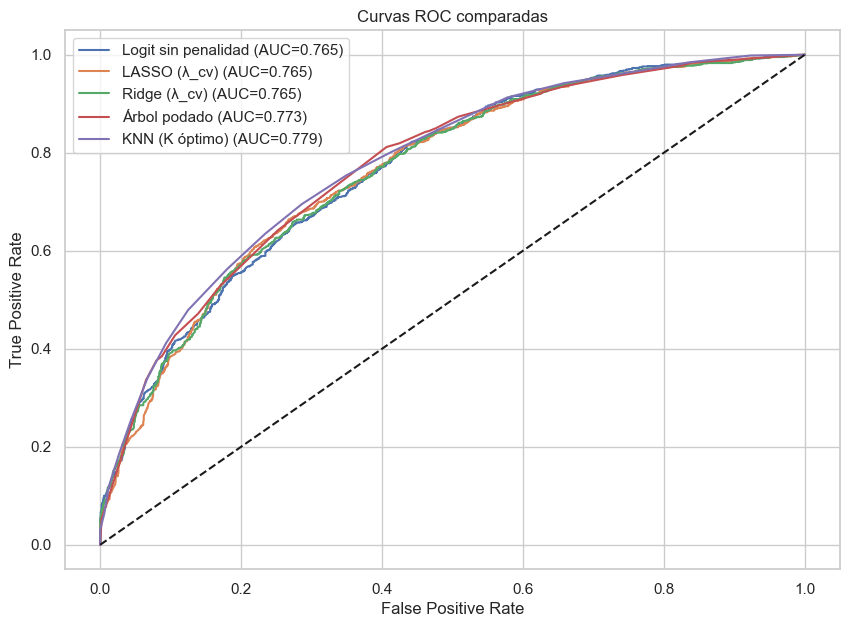

In [33]:
# =============================================================
# C3) CURVAS ROC COMPARADAS
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 7))

for r in resultados:
    plt.plot(r['fpr'], r['tpr'], label=f"{r['modelo']} (AUC={r['AUC']:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC comparadas")
plt.legend()
plt.grid(True)
plt.show()
